In [1]:
from model import  *
from data import *
from lr_reducer import *
import os
import keras
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger
import tensorflow as tf
import keras.backend.tensorflow_backend as K
import matplotlib.pyplot as plt
import time

Using TensorFlow backend.


In [2]:
# using specified GPU
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
input_u_wi = 256
input_u_he = 256
train_path = "data/train"
image_folder = "image"
label_folder = "label"
valid_path =  "data/validation"
valid_image_folder ="image"
valid_label_folder = "label"
# log_filepath = './log'
flag_multi_class = False
num_classes = 2
dp = data_preprocess(train_path=train_path,image_folder=image_folder,label_folder=label_folder,
                         valid_path=valid_path,valid_image_folder=valid_image_folder,
                         valid_label_folder=valid_label_folder,
                         target_rows = input_u_wi, target_cols = input_u_he,
                         flag_multi_class=flag_multi_class,
                         num_classes=num_classes)


In [4]:
train_data = dp.trainGenerator(batch_size=10)
valid_data = dp.validation_load(batch_size=10)
model = unet_v1(input_size = (input_u_wi, input_u_he, 3))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)
csv_logger = CSVLogger('csvLogger/training_28.log', separator=',', append=False)
tbcallback = TensorBoard(log_dir='./tensorboard/Graph_0', histogram_freq=0, batch_size=10, write_graph=True, write_grads=True, write_images=True, 
                         embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')
reduce_lr = LrReducer(monitor='val_loss', patience=20, reduce_rate=0.2,  verbose=1)
model_checkpoint = ModelCheckpoint('models_SCM_muscle/unet_SCM_28.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
start = time.time()
his = model.fit_generator(train_data, steps_per_epoch=200,
                    validation_data=valid_data, validation_steps=100,
                   epochs = 2000, callbacks=[model_checkpoint, tbcallback, reduce_lr, csv_logger, es])     
end = time.time()
print('training time amount: '+str(end - start))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/2000
Found 35 images belonging to 1 classes.
Found 350 images belonging to 1 classes.
Found 35 images belonging to 1 classes.
Found 350 images belonging to 1 classes.
200/200 [==============================] - 87s 435ms/step - loss: 73.4820 - dice_coef: 0.8841 - val_loss: 34.8115 - val_dice_coef: 0.9276

Epoch 00001: val_loss improved from inf to 34.81146, saving model to models_SCM_muscle/unet_SCM_31.hdf5
Epoch 00001: current best val_loss is: 34.81146

Epoch 2/2000
200/200 [==============================] - 79s 394ms/step - loss: 20.4838 - dice_coef: 0.9338 - val_loss: 11.2332 - val_dice_coef: 0.8985

Epoch 00002: val_loss improved from 34.81146 to 11.23318, saving model to models_SCM_muscle/unet_SCM_31.hdf5
Epoch 00002: current best val_loss is

200/200 [==============================] - 79s 396ms/step - loss: 0.0608 - dice_coef: 0.9824 - val_loss: 0.1216 - val_dice_coef: 0.9167

Epoch 00025: val_loss did not improve from 0.12080
Epoch 26/2000
200/200 [==============================] - 79s 397ms/step - loss: 0.0528 - dice_coef: 0.9828 - val_loss: 0.1019 - val_dice_coef: 0.9293

Epoch 00026: val_loss improved from 0.12080 to 0.10191, saving model to models_SCM_muscle/unet_SCM_31.hdf5
Epoch 00026: current best val_loss is: 0.10191

Epoch 27/2000
200/200 [==============================] - 79s 396ms/step - loss: 0.0461 - dice_coef: 0.9833 - val_loss: 0.1021 - val_dice_coef: 0.9233

Epoch 00027: val_loss did not improve from 0.10191
Epoch 28/2000
200/200 [==============================] - 79s 395ms/step - loss: 0.0435 - dice_coef: 0.9827 - val_loss: 0.1086 - val_dice_coef: 0.9130

Epoch 00028: val_loss did not improve from 0.10191
Epoch 29/2000
200/200 [==============================] - 79s 395ms/step - loss: 0.0403 - dice_coef: 0.

200/200 [==============================] - 79s 395ms/step - loss: 0.0199 - dice_coef: 0.9835 - val_loss: 0.0473 - val_dice_coef: 0.9551

Epoch 00061: val_loss did not improve from 0.04545
Epoch 62/2000
200/200 [==============================] - 79s 397ms/step - loss: 0.0201 - dice_coef: 0.9835 - val_loss: 0.0561 - val_dice_coef: 0.9465

Epoch 00062: val_loss did not improve from 0.04545
Epoch 63/2000
200/200 [==============================] - 79s 396ms/step - loss: 0.0216 - dice_coef: 0.9837 - val_loss: 0.0649 - val_dice_coef: 0.9381

Epoch 00063: val_loss did not improve from 0.04545
Epoch 64/2000
200/200 [==============================] - 79s 394ms/step - loss: 0.0193 - dice_coef: 0.9845 - val_loss: 0.0628 - val_dice_coef: 0.9399

Epoch 00064: val_loss did not improve from 0.04545
Epoch 65/2000
200/200 [==============================] - 79s 396ms/step - loss: 0.0222 - dice_coef: 0.9823 - val_loss: 0.0706 - val_dice_coef: 0.9322

Epoch 00065: val_loss did not improve from 0.04545
Epoc

200/200 [==============================] - 79s 394ms/step - loss: 0.0149 - dice_coef: 0.9865 - val_loss: 0.0440 - val_dice_coef: 0.9574

Epoch 00140: val_loss did not improve from 0.04246
Epoch 141/2000
200/200 [==============================] - 79s 396ms/step - loss: 0.0151 - dice_coef: 0.9863 - val_loss: 0.0435 - val_dice_coef: 0.9579

Epoch 00141: val_loss did not improve from 0.04246
Epoch 00141: LrReducer reduce learning rate to 1.600000018697756e-07.

Epoch 142/2000
200/200 [==============================] - 79s 396ms/step - loss: 0.0152 - dice_coef: 0.9862 - val_loss: 0.0464 - val_dice_coef: 0.9550

Epoch 00142: val_loss did not improve from 0.04246
Epoch 143/2000
200/200 [==============================] - 79s 396ms/step - loss: 0.0149 - dice_coef: 0.9865 - val_loss: 0.0440 - val_dice_coef: 0.9574

Epoch 00143: val_loss did not improve from 0.04246
Epoch 144/2000
200/200 [==============================] - 79s 395ms/step - loss: 0.0147 - dice_coef: 0.9867 - val_loss: 0.0429 - val

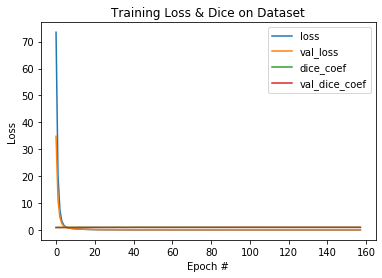

In [6]:
# plot training history
plt.figure()
plt.plot(his.history['loss'], label='loss')
plt.plot(his.history['val_loss'], label='val_loss')
plt.plot(his.history['dice_coef'], label='dice_coef')
plt.plot(his.history['val_dice_coef'], label='val_dice_coef')
plt.title("Training Loss & Dice on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig("result_plots/scm_plots/plot_scm_28.png")
plt.show()